In [15]:
import numpy as np
import scipy.optimize as opti
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_context('poster')

In [16]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [17]:
import sys
sys.path.append('/Users/vonderlinden2/rsx_analysis/writing_to_vtk/source')
import structured_3d_vtk as struc_3d

 # Read in data from first 

In [24]:
def read_and_return_sub_grids(file_path, quantity_names, quantity_subgrid_name, index_name):
    r"""
    """
    array_dict = np.load(file_path)
    quantities = [array_dict[quantity_name] for quantity_name in quantity_names]
    
    grid = array_dict['grid']
    quantity_subgrid = array_dict[quantity_subgrid_name]
    
    quantity_index = array_dict[index_name]
    quantity_subindex = np.swapaxes(quantity_index, 0, 1)
    quantity_subindex = quantity_subindex.reshape(quantity_subgrid.shape)
    quantities_on_subgrid = [quantity[0][quantity_subindex[0], quantity_subindex[1], quantity_subindex[2]]
                             for quantity in quantities]
    return quantities_on_subgrid, quantity_subgrid

In [25]:
[b_x, b_y], b_grid = read_and_return_sub_grids('../../writing_to_vtk/output/2016-06-28/all0000.npz', 
                                               ['B_x', 'B_y'], 'b_grid', 'b_indices')

In [26]:
file_path = '../../writing_to_vtk/output/2016-06-28/all'
ending = '.npz' 
b_x_in_time = []
b_y_in_time = []
for time_point in xrange(21):
    name = file_path + str(time_point).zfill(4) + ending
    [b_x, b_y], b_grid = read_and_return_sub_grids(name, ['B_x', 'B_y'], 
                                                   'b_grid', 'b_indices')
    b_x_in_time.append(b_x)
    b_y_in_time.append(b_y)

# Plot vector field in first plane at first time

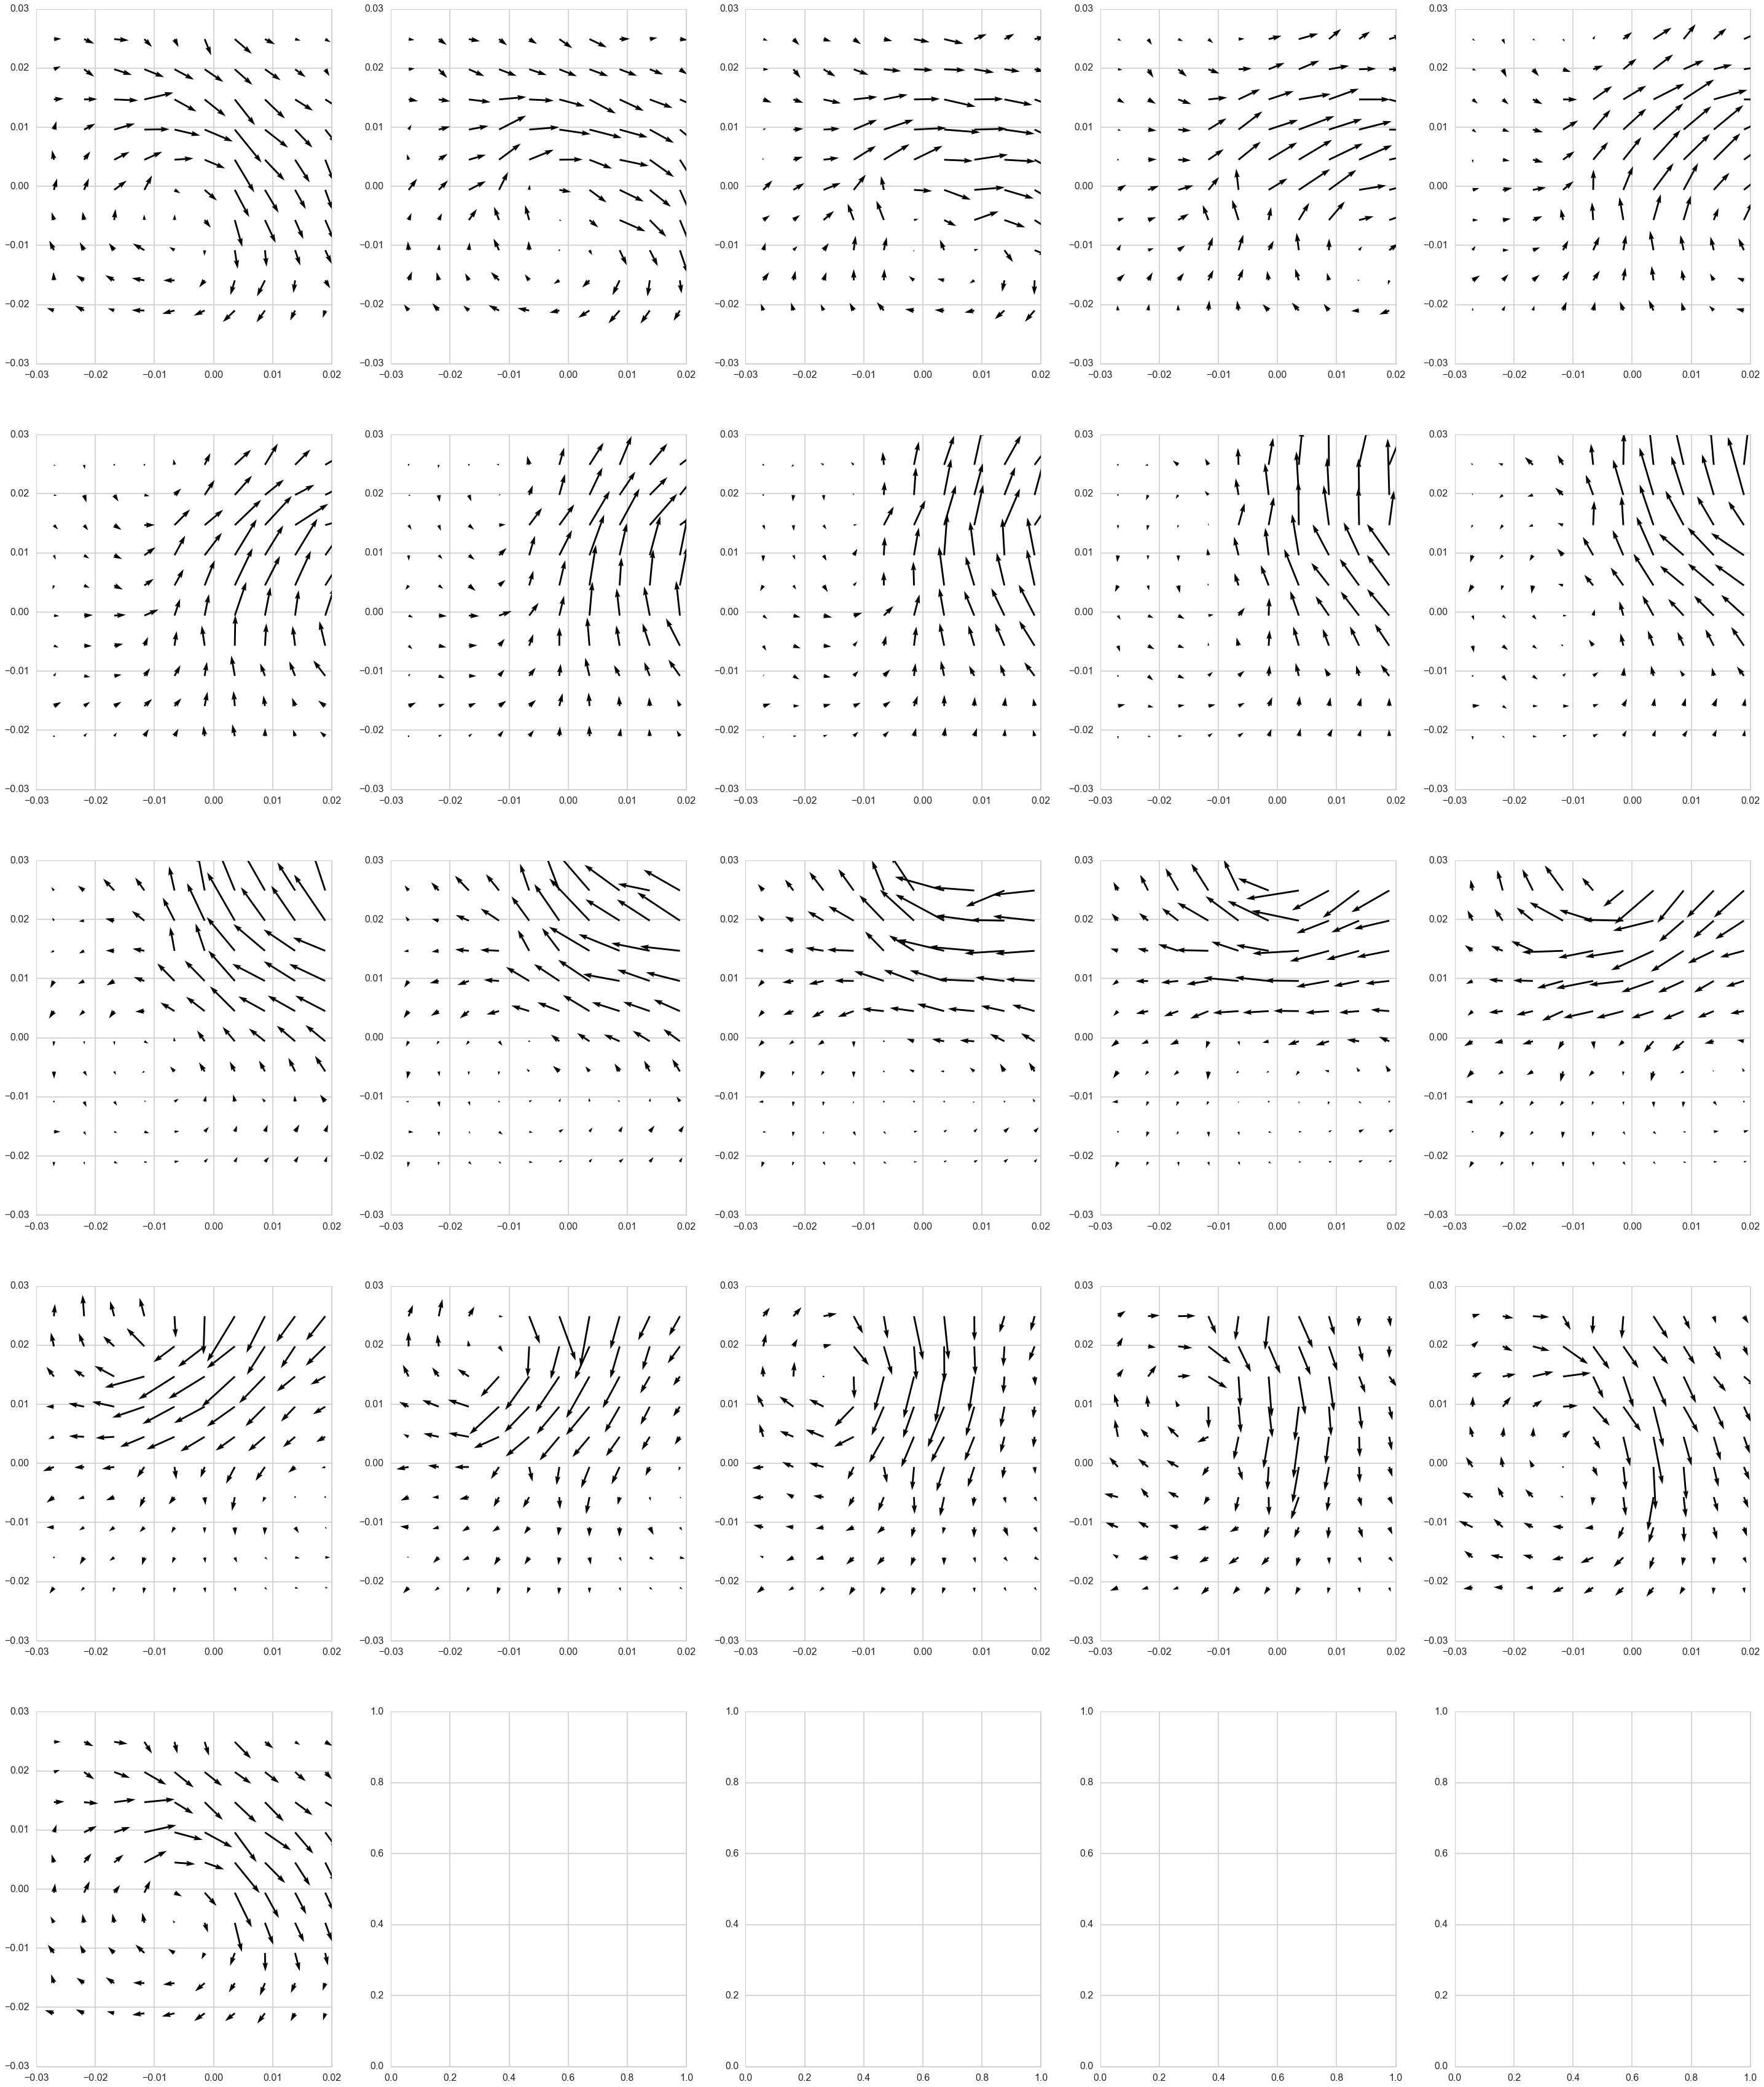

In [27]:
figure, axes = plt.subplots(5, 5, figsize=(50, 60))
for i in xrange(21):
    axes[i/5][i%5].quiver(b_grid[0, :, :, 0][::5,::5], b_grid[1, :, :, 0][::5,::5], 
                          b_x_in_time[i][:, :, 0][::5,::5], b_y_in_time[i][:, :, 0][::5,::5])
    

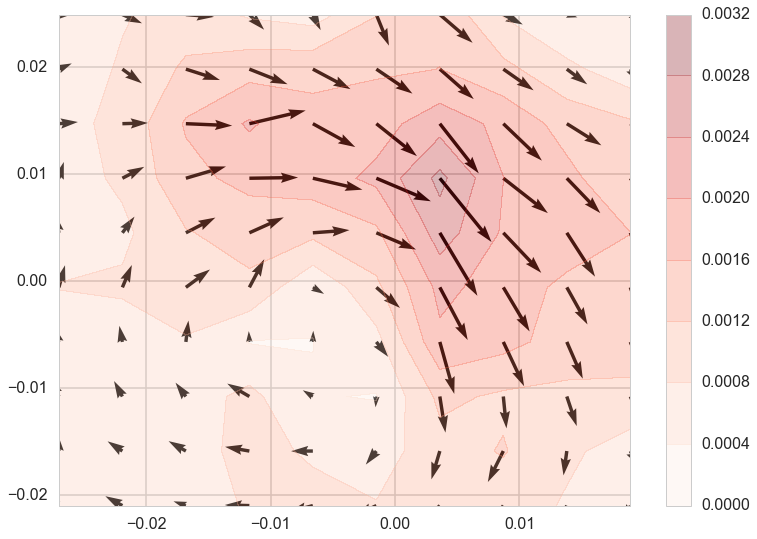

In [28]:
plt.quiver(b_grid[0, :, :, 0][::5,::5], b_grid[1, :, :, 0][::5,::5], 
           b_x_in_time[0][:, :, 0][::5,::5], b_y_in_time[0][:, :, 0][::5,::5])
plt.contourf(b_grid[0, :, :, 0][::5,::5], b_grid[1, :, :, 0][::5,::5], 
             np.sqrt(b_x_in_time[0][:, :, 0][::5,::5]**2 + b_y_in_time[0][:, :, 0][::5,::5]**2), cmap='Reds', alpha=0.3)
plt.colorbar()

[-0.021  -0.0159 -0.0108 -0.0057 -0.0006  0.0045  0.0096  0.0147  0.0198
  0.0249]


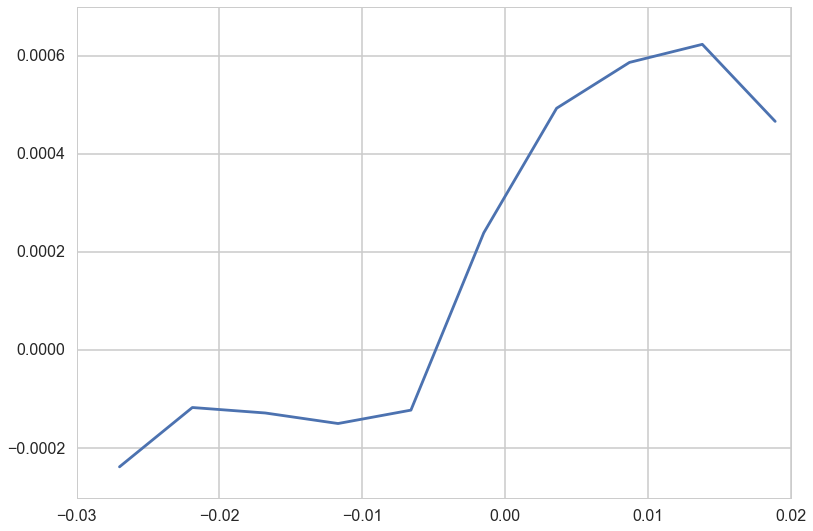

In [29]:
print b_grid[1, :, :, 1][::5, ::5][0, :]
plt.plot(b_grid[0, :, :, 1][::5, ::5][:, 3], b_x_in_time[time_point][::5, ::5, 0][:, 3])

NameError: name 'b_x_zero_crossing' is not defined

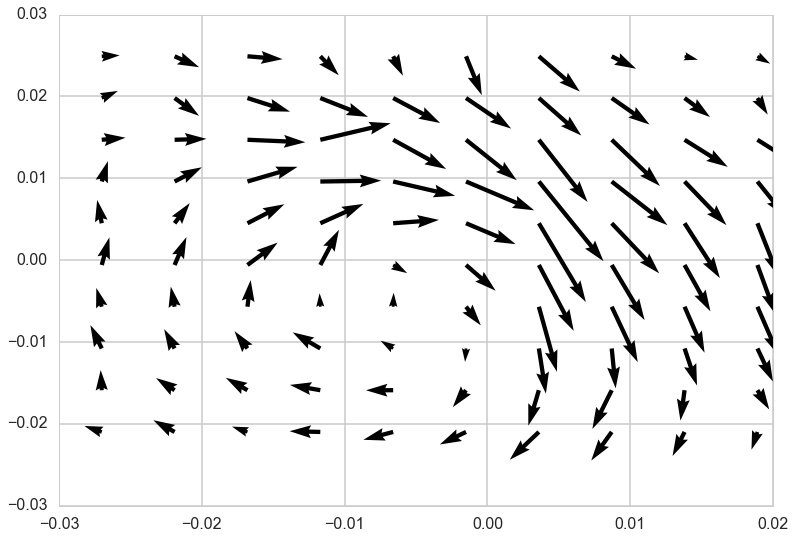

In [30]:
time_point = 0

b_x_zero_crossing_in_x = np.where(np.diff(np.sign(b_x_in_time[time_point][:, :, 0][::5,::5])) != 0)
b_y_zero_crossing_in_x = np.where(np.diff(np.sign(b_y_in_time[time_point][:, :, 0][::5,::5])) != 0)

#mu_0 = 4*np.pi*10**-7
#j_z = (np.gradient(b_x_in_time[time_point][:, :, 0][::5, ::5])[1]*5e3 - np.gradient(b_y_in_time[time_point][:, :, 0][::5, ::5])[0]*5e3)*mu_0

plt.quiver(b_grid[0, :, :, 0][::5, ::5], b_grid[1, :, :, 0][::5, ::5], 
           b_x_in_time[time_point][:, :, 0][::5, ::5], b_y_in_time[time_point][:, :, 0][::5, ::5])
plt.scatter(b_grid[:,::5,::5,:][0, b_x_zero_crossing[0], b_x_zero_crossing[1], 0],
            b_grid[:,::5,::5,:][1, b_x_zero_crossing[0], b_x_zero_crossing[1], 0], s=50)
plt.scatter(b_grid[:,::5,::5,:][0, b_y_zero_crossing[0], b_y_zero_crossing[1], 0],
            b_grid[:,::5,::5,:][1, b_y_zero_crossing[0], b_y_zero_crossing[1], 0], color='red', s=50)
#plt.contourf(b_grid[0, :, :, 0][::5, ::5], b_grid[1, :, :, 0][::5, ::5], j_z, alpha=0.2, cmap='Greens')
#plt.colorbar()

In [ ]:
bx_measurements = struc_3d.read_idl('bx')
by_measurements = struc_3d.read_idl('by')
bz_measurements = struc_3d.read_idl('bz')